1288
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
image:  [[ 253.66667175  254.33332825  253.66667175 ...,   56.33333206
    46.66666794   39.        ]
 [ 254.          254.          253.         ...,   58.           48.33333206
    40.66666794]
 [ 250.          247.          243.33332825 ...,   56.66666794
    48.33333206   42.33333206]
 ..., 
 [  73.33333588   58.           39.66666794 ...,   94.33333588
    91.33333588   86.66666412]
 [  65.66666412   51.66666794   37.33333206 ...,   90.66666412
    90.33333588   85.33333588]
 [  60.           50.           37.66666794 ...,   87.           88.
    86.66666412]]


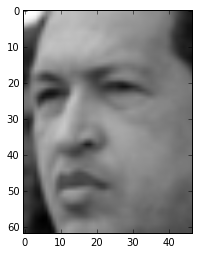

5
Hugo Chavez
data:  [ 253.66667175  254.33332825  253.66667175 ...,   87.           88.
   86.66666412]
[ 0.18519868  0.14937584  0.07094086  0.05945459  0.05058564  0.02961074
  0.02520055  0.02079903  0.01966072  0.01907573  0.01620555  0.01489183
  0.01267208  0.01084428  0.01011461  0.00977792  0.00910552  0.00888432
  0.00806098  0.00708861  0.00684076  0.00637825  0.00599177  0.00576931
  0.00554907  0.00531656  0.00507129  0.00469798  0.00460745  0.00415814
  0.00393714  0.00374093  0.00363892  0.00354287  0.00343353  0.00333339
  0.00319498  0.00308735  0.00303888  0.00285599  0.00280344  0.00273738
  0.00257656  0.00255037  0.00248746  0.00240969  0.0023527   0.00230328
  0.00228079  0.00218687  0.00216622  0.00213967  0.00201425  0.00200494
  0.00194476  0.00191501  0.00187502  0.0018332   0.00182578  0.00179087
  0.00169041  0.00165783  0.00165362  0.0015992   0.0015481   0.00153444
  0.00148913  0.00147831  0.00146802  0.00143928  0.00138731  0.00134848
  0.00132095  0.001

In [13]:
#Kayla Huff
#Homework 4

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas
from sklearn import cross_validation as cv
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import grid_search

#fetch the faces data of people w/ more than 70 photos
lfw_people = fetch_lfw_people(min_faces_per_person=70)
print len(lfw_people.images)
print lfw_people.target_names

image_num = 0
print "image: ", lfw_people.images[image_num]
#print out picture in grayscale
plt.imshow(lfw_people.images[image_num], cmap='gray')
plt.show()

img_target = lfw_people.target[image_num] #.target gives you a number

print img_target
print lfw_people.target_names[img_target]

print "data: ", lfw_people.data[image_num]
#split into test and train sets
(train_data, test_data, train_target, test_target) = train_test_split(lfw_people.data, lfw_people.target, test_size = 0.2)

#whiten to true
#principal component analysis
#components to 100
pca = PCA(n_components=100, whiten=True)
pca.fit(train_data)
transformed_train_data = pca.transform(train_data)
transformed_test_data = pca.transform(test_data)
#this is the variance/importance of each component
print pca.explained_variance_ratio_
#print pca.components_[0]
#print pca.components_[1]

#set parameters using dictionary list
parameters = [{'kernel':['linear'], 'C':[1.0,2.0,3.0,4.0,5.0]},{'kernel':['poly'],'degree':[1.0,2.0,3.0,4.0,5.0],'coef0':[0.0,1.0,2.0,3.0,4.0,5.0]},{'kernel':['sigmoid'],'C':[1.0,2.0,3.0,4.0,5.0],'coef0':[0.0,1.0,2.0,3.0,4.0,5.0]}]

#grid search 
clf = grid_search.GridSearchCV(SVC(), parameters)

#clf = SVC(kernel="linear", C=3.0)
#clf = SVC(kernel="poly", degree=1.0)

clf.fit(train_data, train_target)

#print off best parameters
print clf.best_estimator_.kernel
print clf.best_estimator_.degree
print clf.best_estimator_.coef0

#accuracy
predictions = clf.predict(test_data)
print accuracy_score(predictions, test_target)

#for i in range(len(predictions)):
    #plt.imshow(test_data[i].reshape(62,47),cmap='gray')
    #plt.show()
    
    #print "predicted: ", lfw_people.target_names[predictions[i]], "actual: ", lfw_people.target_names[test_target[i]]